In [1]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


## Data Retrieval

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

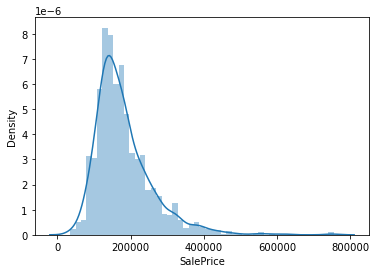

In [2]:
#Load the training data
df_train=pd.read_csv('train.csv')

#Check the column headers
print(df_train.columns)

#Descriptive statistics summary
df_train['SalePrice'].describe()

#histogram
sns.distplot(df_train['SalePrice'])

<AxesSubplot:>

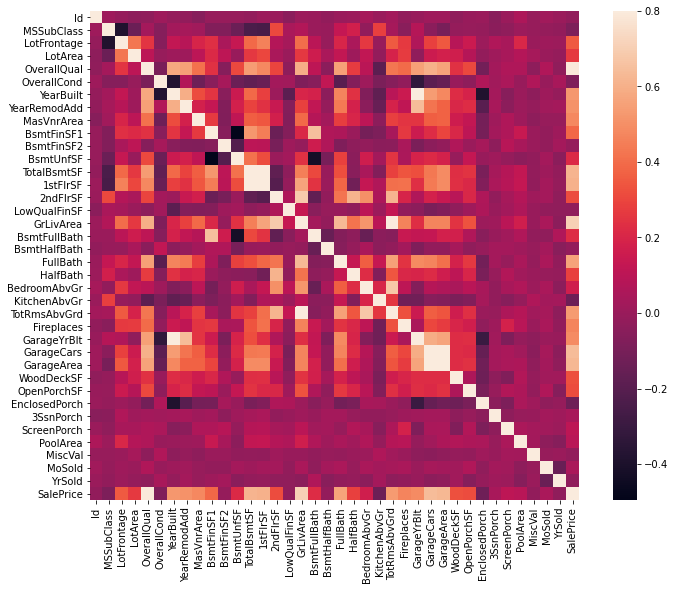

In [3]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

<AxesSubplot:xlabel='EnclosedPorch', ylabel='SalePrice'>

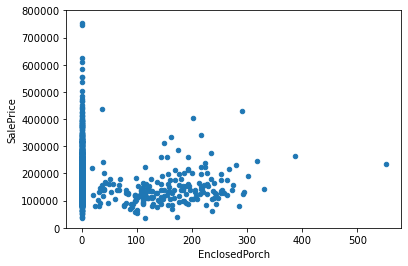

In [4]:
#check if this variable is not relevant to the sale price
data = pd.concat([df_train['SalePrice'], df_train['EnclosedPorch']], axis=1)
data.plot.scatter(x='EnclosedPorch', y='SalePrice', ylim=(0,800000))

## Data Standardization

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

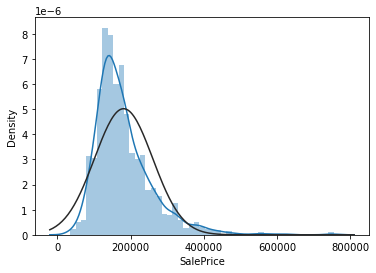

In [5]:
# feature scaling, only apply to numeric data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(df_train[["GrLivArea","SalePrice"]])
sns.distplot(df_train["SalePrice"],fit=norm)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

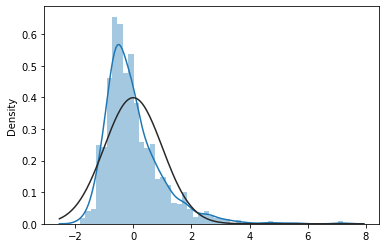

In [6]:
sns.distplot(X_train[:,1],fit=norm)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GrLivArea', ylabel='Density'>

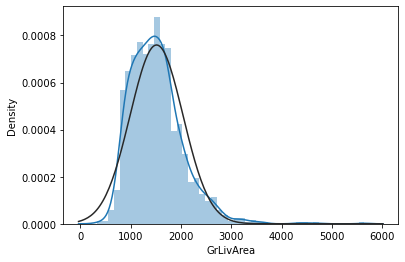

In [7]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GrLivArea', ylabel='Density'>

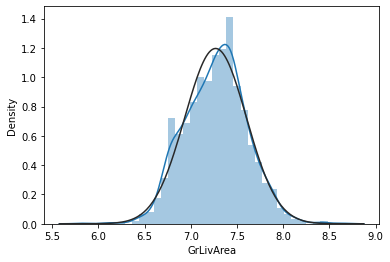

In [8]:
# satisfy some assumption of some model
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
sns.distplot(df_train['GrLivArea'],fit=norm)

## Data cleaning

In [9]:
# check all the data types in different feature columns
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [10]:
#check duplicated rows
df_train[df_train.duplicated()==True]

#check column data types
res = df_train.dtypes
print(res[res == np.dtype('int64')])

Id               int64
MSSubClass       int64
LotArea          int64
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
BsmtFinSF1       int64
BsmtFinSF2       int64
BsmtUnfSF        int64
TotalBsmtSF      int64
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
BsmtFullBath     int64
BsmtHalfBath     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
TotRmsAbvGrd     int64
Fireplaces       int64
GarageCars       int64
GarageArea       int64
WoodDeckSF       int64
OpenPorchSF      int64
EnclosedPorch    int64
3SsnPorch        int64
ScreenPorch      int64
PoolArea         int64
MiscVal          int64
MoSold           int64
YrSold           int64
SalePrice        int64
dtype: object


In [11]:
print(res[res == np.dtype('bool')])
print(res[res == np.dtype('object')])
print(res[res == np.dtype('float64')])

#standardize
print(df_train["LotConfig"].unique())

Series([], dtype: object)
MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature   

In [12]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [13]:
#dealing with missing data
# in the whole column
df_train = df_train.drop((missing_data[missing_data['Percent'] > 0.18]).index,1)

# in the row: drop relevant rows
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

In [14]:
#if not drop, we can impute (condition: lotArea does not have a lot missing values)
# check correlation with LotArea
df_train['LotFrontage'].corr(df_train['LotArea'])

# use sqrtLotArea (edge length)
df_train['SqrtLotArea']=np.sqrt(df_train['LotArea'])
df_train['LotFrontage'].corr(df_train['SqrtLotArea'])

cond = df_train['LotFrontage'].isnull()
df_train["LotFrontage"][cond]=df_train["SqrtLotArea"][cond]
print(df_train["LotFrontage"].isnull().sum())

#flag the missing data as missing
mis=df_train['GarageType'].isnull()
df_train["GarageType"][mis]="Missing"
df_train["GarageType"].unique()

0


<ipython-input-14-174e8e92d2e9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["LotFrontage"][cond]=df_train["SqrtLotArea"][cond]
<ipython-input-14-174e8e92d2e9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["GarageType"][mis]="Missing"


array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'Missing', 'Basment',
       '2Types'], dtype=object)

(1459, 77)
(1444, 77)


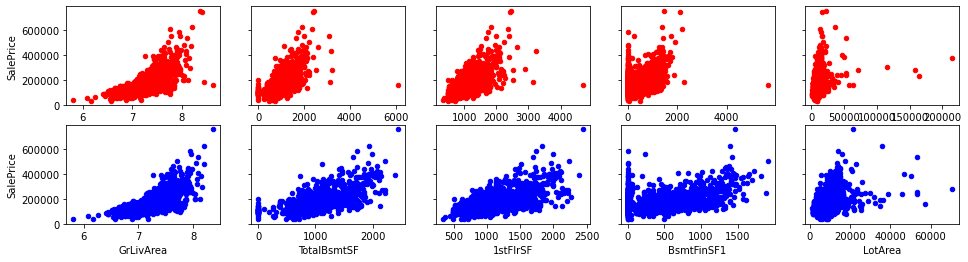

In [15]:
#identify the outliers
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)
# ncols, nrows ==> plt.subplots(2, 5)
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(16, 4))

# flatten array index
axes = np.ravel(axes)
col_name = ['GrLivArea','TotalBsmtSF','1stFlrSF','BsmtFinSF1','LotArea']

for i, c in zip(range(5), col_name):
    df_train.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, c='r')
    
# delete outliers
print(df_train.shape)
df_train = df_train[df_train['GrLivArea'] < 4500]
df_train = df_train[df_train['LotArea'] < 100000]
df_train = df_train[df_train['TotalBsmtSF'] < 3000]
df_train = df_train[df_train['1stFlrSF'] < 2500]
df_train = df_train[df_train['BsmtFinSF1'] < 2000]

print(df_train.shape)

for i, c in zip(range(5,10), col_name):
    df_train.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, c='b')


## Feature Selection

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1444 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1444 non-null   int64  
 1   MSSubClass     1444 non-null   int64  
 2   MSZoning       1444 non-null   object 
 3   LotFrontage    1444 non-null   float64
 4   LotArea        1444 non-null   int64  
 5   Street         1444 non-null   object 
 6   LotShape       1444 non-null   object 
 7   LandContour    1444 non-null   object 
 8   Utilities      1444 non-null   object 
 9   LotConfig      1444 non-null   object 
 10  LandSlope      1444 non-null   object 
 11  Neighborhood   1444 non-null   object 
 12  Condition1     1444 non-null   object 
 13  Condition2     1444 non-null   object 
 14  BldgType       1444 non-null   object 
 15  HouseStyle     1444 non-null   object 
 16  OverallQual    1444 non-null   int64  
 17  OverallCond    1444 non-null   int64  
 18  YearBuil

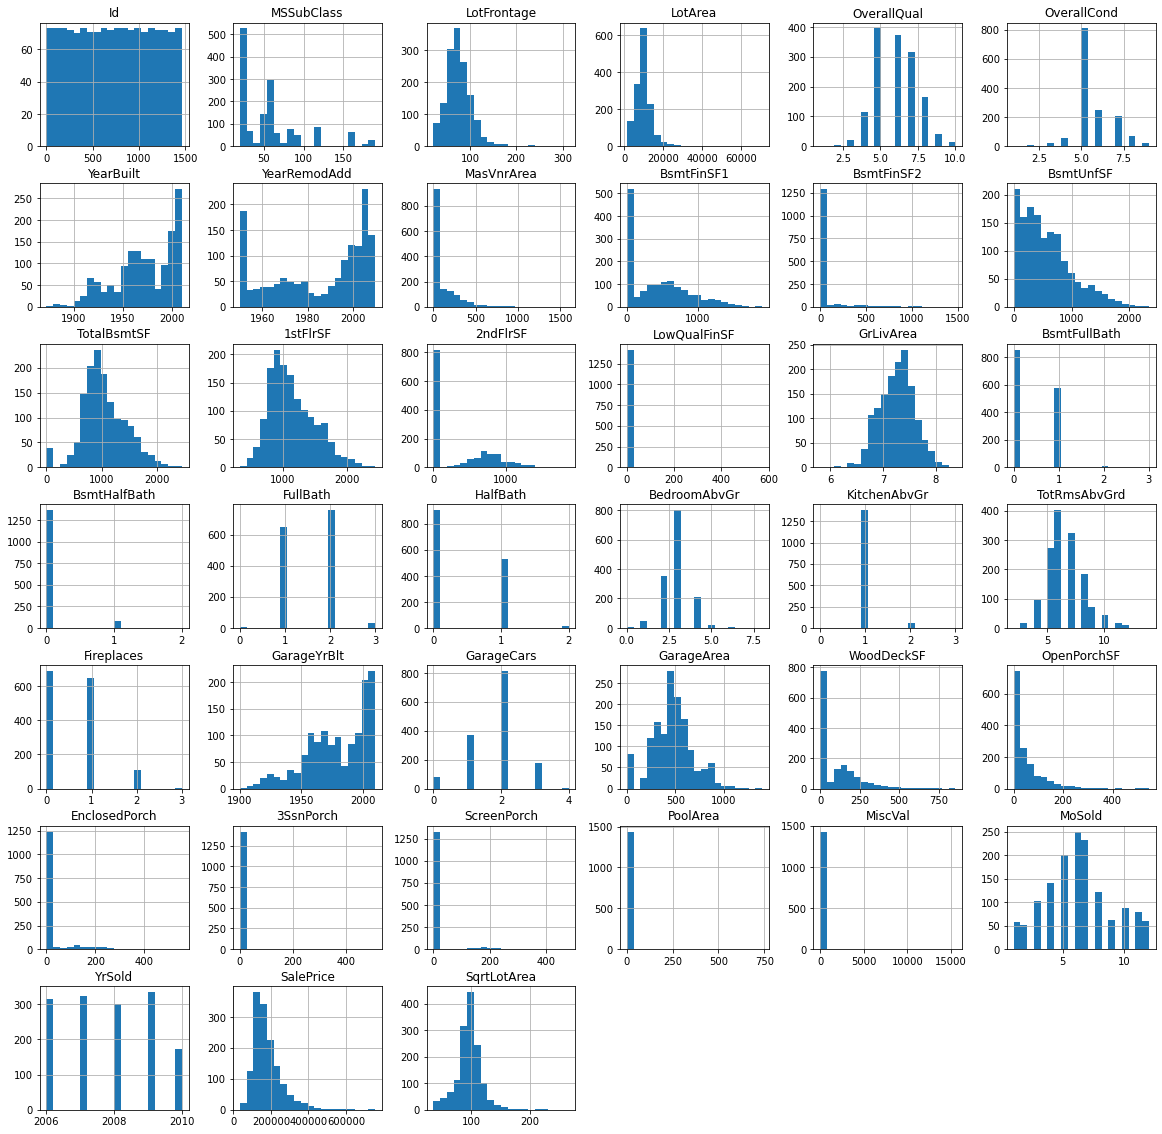

In [16]:
#Now feature selection part
print(df_train.info()) #still 76 features remain

#check distribution of all the inputs
df_train.hist(figsize=(20, 20), bins=20)
plt.show()


In [17]:
#Based on the distribution results, check suspicious inputs
#3SsnPorch has too many zeros
df_train['3SsnPorch'].describe()
# there are two many 0s, over 75%
# so this can be deleted

count    1444.000000
mean        3.447368
std        29.477207
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64

In [18]:
np.unique(df_train['BedroomAbvGr'].values)

array([0, 1, 2, 3, 4, 5, 6, 8], dtype=int64)

In [19]:
#BedroomAbvGr is not normal distributed
np.unique(df_train['BedroomAbvGr'].values)
# count how many bedroom
df_train.groupby('BedroomAbvGr').count()['Id']

# according to results, 5,6,7 can be combined

BedroomAbvGr
0      6
1     50
2    353
3    798
4    208
5     21
6      7
8      1
Name: Id, dtype: int64

In [20]:
#Two Basement bathroom variables, can be merged together
df_train.groupby('BsmtFullBath').count()['Id']


BsmtFullBath
0    854
1    577
2     12
3      1
Name: Id, dtype: int64

In [21]:
df_train.groupby('BsmtHalfBath').count()['Id']


BsmtHalfBath
0    1363
1      79
2       2
Name: Id, dtype: int64

In [22]:
# combine both full bath room and half bath together as a bathroom data feature
# df_train['Bathroom']=df_train['BsmtFullBath']+ df_train['BsmtHalfBath'] 

In [23]:
#Four basement area variables. Three can be dropped
df_train[['TotalBsmtSF', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF']].head()
# because totalBsmtSF = BsmtFinSF2 + BsmtFinSF1 + BsmtUnfSF, so this one can only keep one data feature, which is TotalBsmtSF

,TotalBsmtSF,BsmtFinSF2,BsmtFinSF1,BsmtUnfSF
0,856,0,706,150
1,1262,0,978,284
2,920,0,486,434
3,756,0,216,540
4,1145,0,655,490


In [24]:
# Three more porch related variables. We can merge them togher or just keep one.
df_train[['OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']].describe()

,OpenPorchSF,EnclosedPorch,ScreenPorch
count,1444.000000,1444.000000,1444.000000
mean,46.160665,21.736842,15.110111
std,65.464028,60.699492,55.896012
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,24.000000,0.000000,0.000000
75%,66.500000,0.000000,0.000000
max,547.000000,552.000000,480.000000


In [25]:
#Garage area and cars must be correlated. Use area or cars?
df_train.corr()['GarageArea']['GarageCars']

#garage year built can be also dropped because we have a varaible: house year built.
df_train.corr()['GarageYrBlt']['YearBuilt']

# they have high related, can keep one data feature

0.8244781251158749

In [26]:
#KitchenAbvGr can be dropped as there are too many 1s
df_train['KitchenAbvGr'].describe() 

count    1444.000000
mean        1.046399
std         0.220079
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotArea', ylabel='Density'>

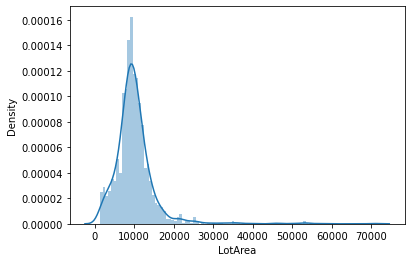

In [27]:
#Lot area has a small proportion houses which have large area, need to be filtered.
sns.distplot(df_train['LotArea'], bins=100) #can filter Lot Area above 50000 to 50001
# has been droped as an outlier

In [28]:
#Now let's check the correlation matrix for all the data features with the target label.
df_train.corr()['SalePrice'].sort_values()

EnclosedPorch   -0.142535
KitchenAbvGr    -0.139641
MSSubClass      -0.074893
OverallCond     -0.072088
YrSold          -0.035890
BsmtFinSF2      -0.031537
Id              -0.027337
LowQualFinSF    -0.024008
MiscVal         -0.021708
BsmtHalfBath    -0.015653
PoolArea         0.034111
3SsnPorch        0.049744
MoSold           0.058825
ScreenPorch      0.113776
BedroomAbvGr     0.177157
BsmtFullBath     0.212605
BsmtUnfSF        0.220692
LotFrontage      0.288245
HalfBath         0.294516
OpenPorchSF      0.329010
2ndFlrSF         0.333522
WoodDeckSF       0.337824
BsmtFinSF1       0.372870
LotArea          0.377836
SqrtLotArea      0.405605
Fireplaces       0.455920
MasVnrArea       0.490951
GarageYrBlt      0.499614
YearRemodAdd     0.521644
TotRmsAbvGrd     0.530232
YearBuilt        0.534541
FullBath         0.563450
1stFlrSF         0.613425
TotalBsmtSF      0.632876
GarageArea       0.637941
GarageCars       0.648486
GrLivArea        0.701345
OverallQual      0.799205
SalePrice   

In [30]:
# based on corr for price and all the data features, we found that 'YearBuilt' and 'YearRemodAdd' have a higher correlated

#YearBuilt and YearRemodAdd seems correlated
df_train.corr()['YearBuilt']['YearRemodAdd'] 


0.5912001321282745

In [31]:
#Only select numeric variables (including SalePrice)
num_attrs = df_train.select_dtypes([np.int64, np.float64]).columns.values
df_train_num= df_train[num_attrs]

In [32]:
#Merge two bathroom variables
df_train_num['Bath']= df_train_num['BsmtFullBath'] + df_train_num['BsmtHalfBath'] 

#Remove the above variables
df_train_num=df_train_num.drop(['Id','3SsnPorch','BsmtFinSF2','BsmtFinSF1','BsmtUnfSF','EnclosedPorch','ScreenPorch','GarageCars',
                                'GarageYrBlt','KitchenAbvGr','YearRemodAdd','BsmtFullBath', 'BsmtHalfBath'],axis=1)


<ipython-input-32-da757cae4a75>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_num['Bath']= df_train_num['BsmtFullBath'] + df_train_num['BsmtHalfBath']


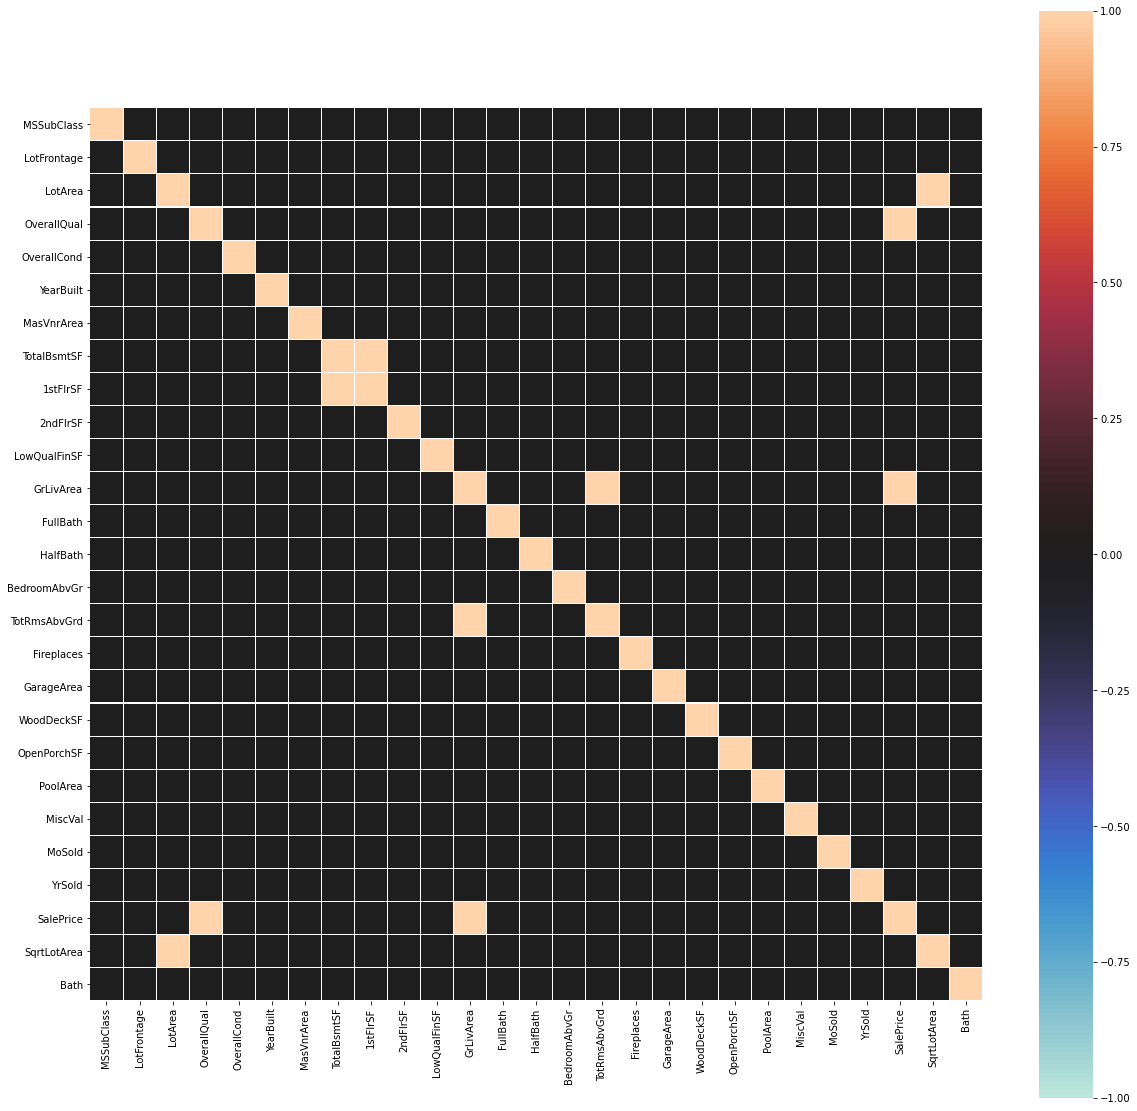

In [33]:
#Get the correlation matrix
corr = df_train_num.corr()
corr = corr.applymap(lambda x : 1 if x > 0.7 else -1 if x < -0.7 else 0)
f, ax = plt.subplots(figsize=(20, 20))

# vmax, vmin shows the scale for the graph shows
# the color of center value
# as the figure to square
# linewidths: Specifies the border width for each cell
sns.heatmap(corr, vmax=1, center=0,vmin=-1 ,  square=True, linewidths=.005)
plt.show()

# multicollinearity: only leave one data feature from above similar data features except target data feature 

#Identify two correlated variables
# need to drop one column = 'TotalBsmtSF' or '1stFlrSF'
df_train_num=df_train_num.drop(['TotRmsAbvGrd','1stFlrSF'],axis=1)

In [55]:
#list the correlation values
df_train_num.corr()['SalePrice'].sort_values()

#select correlation >0.5
df_train_num=df_train_num[df_train_num.columns[df_train_num.corr()['SalePrice']>0.5]]
df_train_num = df_train_num.drop(['1stFlrSF', 'TotRmsAbvGrd'],axis=1)
df_train_num.columns


Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'FullBath',
       'GarageArea', 'SalePrice'],
      dtype='object')

## Build Model

In [56]:
#Build the model
from sklearn import linear_model
reg = linear_model.LinearRegression()

#Split the input and output
df_train_num_x=df_train_num.drop('SalePrice',axis=1) 
df_train_num_y=df_train_num['SalePrice']

#Train the model
reg.fit(df_train_num_x, df_train_num_y)

#Check the model coefficients
print('Coefficients: \n', reg.coef_)

#Get the prediction based on the training dataset
preds = reg.predict(df_train_num_x)



Coefficients: 
 [ 2.04598677e+04  2.66133226e+02  3.92029868e+01  7.29304529e+04
 -1.86908609e+03  5.23951995e+01]


MAE: 24322.111314620728
MSE: 1232647709.295812
RMSE: 35109.08300277596


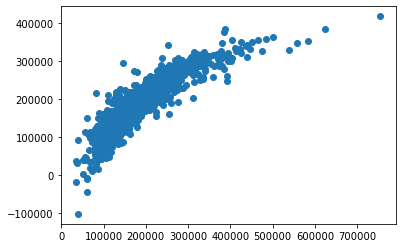

In [57]:
#Check the training dataset prediction performance
from sklearn import metrics
#Mean Absolute Error 
print('MAE:', metrics.mean_absolute_error(df_train_num_y, preds))
#Mean Squared Error
print('MSE:', metrics.mean_squared_error(df_train_num_y, preds))
#Root Mean Squared Error
print('RMSE:', np.sqrt(metrics.mean_squared_error(df_train_num_y, preds)))

#Plot the predictions and actuals
plt.scatter(df_train_num_y,preds)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

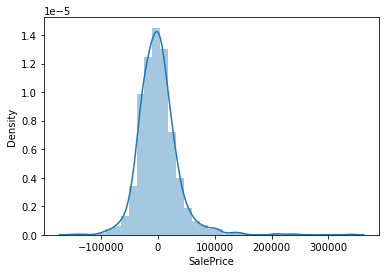

In [58]:
#Check the error
# sns.distribution plot: use train label - prediction with bin size = 35
sns.distplot((df_train_num_y-preds),bins=35)

# error satisfy normal distribution

In [59]:
#Load the test data
df_test=pd.read_csv('test.csv')
df_test['Bath']= df_test['BsmtFullBath'] + df_test['BsmtHalfBath'] 
df_test_num= df_test[['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea','FullBath', 'GarageArea','Id']]

#IMPORTANT: All the feature engineering & data cleaning steps we have done to the training variables, we have to do the same for the test dataset!!
#Before we can feed the data into our model, we have to check missing values again. Otherwise the code will give you an error.
df_test_num.isnull().sum()

OverallQual    0
YearBuilt      0
TotalBsmtSF    1
GrLivArea      0
FullBath       0
GarageArea     1
Id             0
dtype: int64

In [60]:
df_test_num['TotalBsmtSF']=df_test_num['TotalBsmtSF'].fillna(np.mean(df_test_num['TotalBsmtSF']))
df_test_num['GarageArea']=df_test_num['GarageArea'].fillna(np.mean(df_test_num['GarageArea']))
df_test_num.isnull().sum()

<ipython-input-60-721c5142741d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_num['TotalBsmtSF']=df_test_num['TotalBsmtSF'].fillna(np.mean(df_test_num['TotalBsmtSF']))
<ipython-input-60-721c5142741d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_num['GarageArea']=df_test_num['GarageArea'].fillna(np.mean(df_test_num['GarageArea']))


OverallQual    0
YearBuilt      0
TotalBsmtSF    0
GrLivArea      0
FullBath       0
GarageArea     0
Id             0
dtype: int64

In [61]:
#Predict the results for test dataset
submit= pd.DataFrame()
submit['Id'] = df_test_num['Id']
#select features 
preds_out = reg.predict(df_test_num[['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea','FullBath', 'GarageArea']])
submit['SalePrice'] = preds_out
#final submission  
submit.to_csv('test_submit.csv', index=False)

<AxesSubplot:xlabel='YearBuilt'>

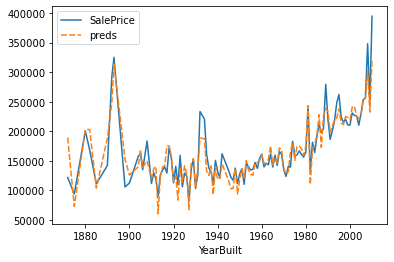

In [63]:
#Check output
#check yearly alignment
df_train['preds']=preds
df_yearly=df_train[['SalePrice','preds','YearBuilt']].groupby('YearBuilt').mean()
sns.lineplot(data=df_yearly)

<AxesSubplot:xlabel='OverallQual'>

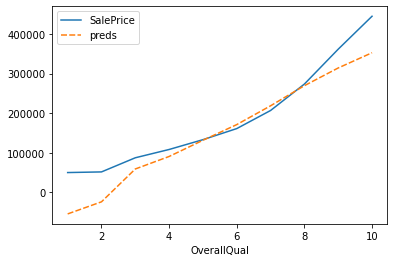

In [64]:
#check Rates the overall material and finish of the house
df_yearly1=df_train[['SalePrice','preds','OverallQual']].groupby('OverallQual').mean()
sns.lineplot(data=df_yearly1)

<AxesSubplot:xlabel='OverallCond'>

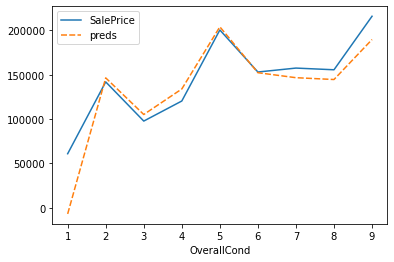

In [65]:
#check Rates the overall condition of the house
df_yearly2=df_train[['SalePrice','preds','OverallCond']].groupby('OverallCond').mean()
sns.lineplot(data=df_yearly2)

<AxesSubplot:xlabel='BedroomAbvGr'>

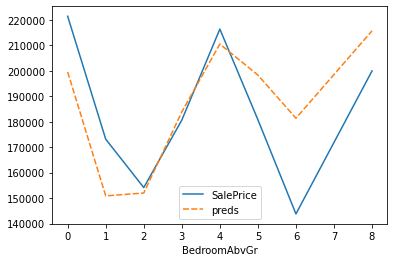

In [68]:
#check Bedrooms
df_yearly3=df_train[['SalePrice','preds','BedroomAbvGr']].groupby('BedroomAbvGr').mean()
# df_yearly3
sns.lineplot(data=df_yearly3)